<a href="https://colab.research.google.com/github/kirwarobert/cnn/blob/main/agricultural_production_in_kenya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kenya's Agricultural Production
"This data shows Kenya's Agricultural production since independence, and it can be used to come up with insights which can influence decisions affecting the Agricultural sector which is Kenya's backbone."

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install openpyxl

In [7]:
import pandas as pd
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/Kenyas_Agricultural_Production.xlsx.zip') as z:
    # Get the first file in the archive (assuming it's the Excel file)
    excel_file = z.namelist()[0]
    # Read the Excel file from the archive
    with z.open(excel_file) as f:
        df = pd.read_excel(f)

df.head(2)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1976,1976,tonnes,10.0,E,Estimated value
1,QCL,Crops and livestock products,404,Kenya,5510,Production,1929.07,"Abaca, manila hemp, raw",1977,1977,tonnes,10.0,E,Estimated value


In [8]:
df.isnull().sum()

,0
Domain Code,0
Domain,0
Area Code (M49),0
Area,0
Element Code,0
Element,0
Item Code (CPC),0
Item,0
Year Code,0
Year,0


In [9]:
df["Unit"].value_counts()

,count
Unit,
tonnes,7047
ha,4171
hg/ha,4109
Head,1408
hg/An,732
1000 Head,297
No,121
0.1g/An,114
100mg/An,61


Text(0.5, 0, 'Number of Training Examples')

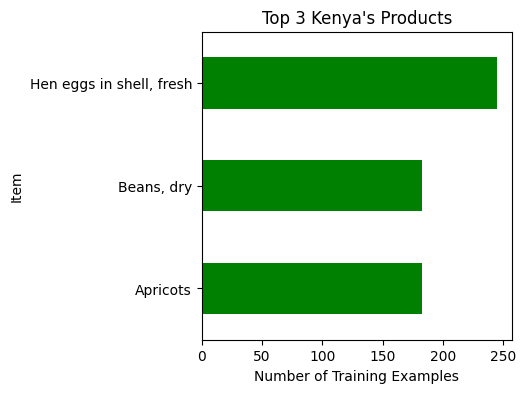

In [10]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
df["Item"].value_counts().head(3).sort_values(ascending=True).plot(
    kind="barh", color='g', ax=ax, title="Top 3 Kenya's Products"
)
ax.set_xlabel("Number of Training Examples")

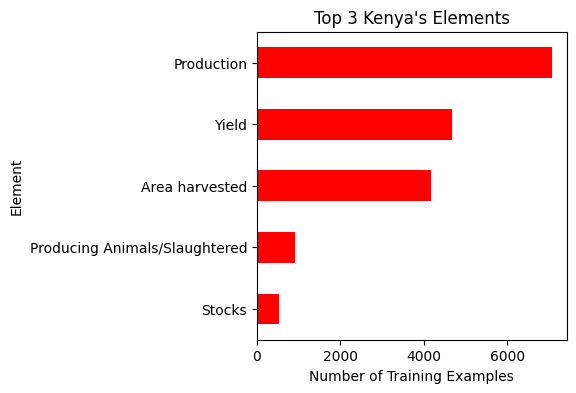

In [11]:
#By Rob Mulla https://www.kaggle.com/code/robikscube/sign-language-recognition-eda-twitch-stream

fig, ax = plt.subplots(figsize=(4, 4))
df["Element"].value_counts().head().sort_values(ascending=True).plot(
    kind="barh", color='r', ax=ax, title="Top 3 Kenya's Elements"
)
ax.set_xlabel("Number of Training Examples")
plt.show()

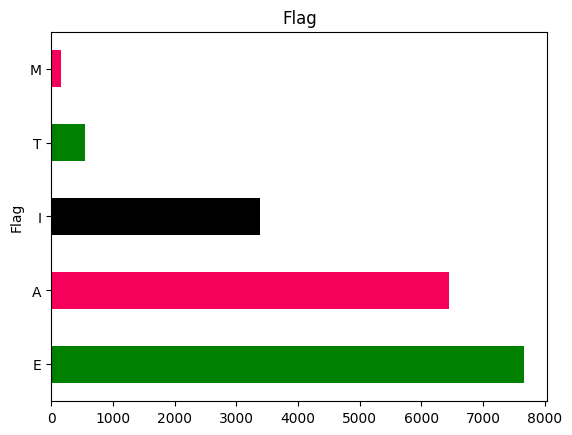

In [12]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil

#df["Flag"].value_counts().plot.bar(color=['blue', '#f5005a'], title='Kenya s Flag Description)

df["Flag"].value_counts().plot.barh(color=['green', '#f5005a', 'black'], title='Flag');

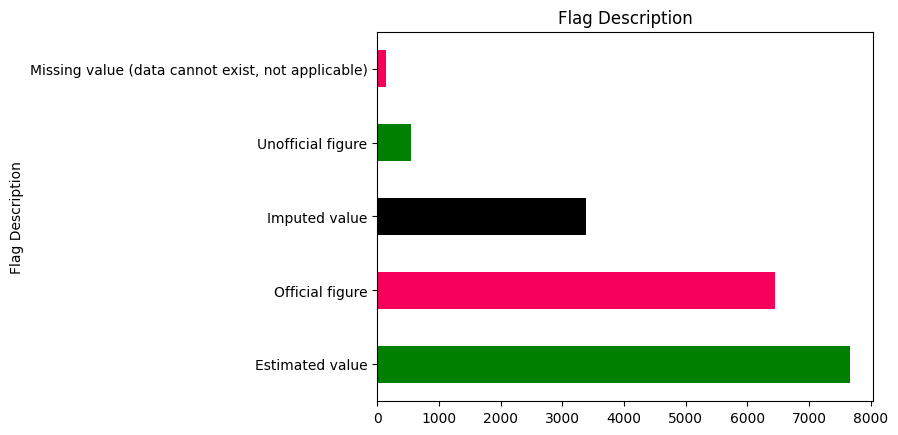

In [13]:
#Code by Lucas Abrahão https://www.kaggle.com/lucasabrahao/trabalho-manufatura-an-lise-de-dados-no-brasil


df["Flag Description"].value_counts().plot.barh(color=['green', '#f5005a', 'black'], title='Flag Description');

In [14]:
#Code by Varun Sai Kanuri https://www.kaggle.com/code/varunsaikanuri/plotly-notebook-for-beginners

fig=px.bar(df.head(),x='Year',y='Value',color='Unit', title='<b>Kenya Agricultural Production Yearly</b>')
fig.update_layout(title_x=0.5)
fig.show()

In [15]:
#Code by Varun Sai Kanuri https://www.kaggle.com/code/varunsaikanuri/plotly-notebook-for-beginners

fig=px.bar(df.query('Element=="Production"'),x='Unit',y='Value',color='Element Code',title='<b>Kenya Agricultural Production by Values</b>',template='plotly')
fig.update_layout(
    title_x=0.5,
    font_color="BLUE",
    title_font_color="RED",
    legend_title_font_color="MAGENTA"
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [16]:
#Code by Varun Sai Kanuri https://www.kaggle.com/code/varunsaikanuri/plotly-notebook-for-beginners

fig=px.bar(df.query('Flag=="A"'),x='Unit',y='Element',color='Element Code',title='<b>Kenya Units of Element Production</b>',template='plotly')
fig.update_layout(
    title_x=0.5,
    font_color="BLUE",
    title_font_color="RED",
    legend_title_font_color="MAGENTA"
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [17]:
#Code by Varun Sai Kanuri https://www.kaggle.com/code/varunsaikanuri/plotly-notebook-for-beginners

fig=px.bar(df.query('Unit=="Head"'),x='Year',y='Flag',color='Flag Description',title='<b>Kenya Production by Flag</b>',template='plotly')
fig.update_layout(
    title_x=0.5,
    font_color="BLUE",
    title_font_color="RED",
    legend_title_font_color="MAGENTA"
)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [18]:
#Code by Varun Sai Kanuri https://www.kaggle.com/code/varunsaikanuri/plotly-notebook-for-beginners

fig=px.bar(df, x='Year',y='Element Code',color='Element',title='<b>Kenya Yearly Production by Element</b>')
fig.update_layout(title_x=0.5)
fig.show()